### 발렌타인 데이 예측

1. feature
- Name: 가상인물의 이름
- Age: 가상인물의 나이
- Gender: 가상인물의 성별
- Icome: 가상인물의 수익
- Appearance_Score: 개인의 외모를 기준으로 개인이 어떻게 인식되는지를 나타내는 수치 점수
- Interests_Score: 개인의 관심사가 다른 사람의 관심사와 얼마나 일치하거나 호환되는지를 나타내는 수치 점수
- Confidence_Score: 개인이 인지하는 신뢰도를 나타내는 수치 점수
- Educational_Status: 개인의 학력이나 교육 수준
- Job_Type: 개인의 직업 유형이나 고용 상태

2. target
- Valentine_Date: 개인의 발렌타인데이가 있는지(1), 아닌지(0)를 나타내는 이진(0, 1) 분류에 사용되는 이진 특성

#### 가정: 발렌타인 데이에 데이트가 있는 것을 1, 없는 것을 0 이라고 분류하는 시나리오

 - 양성(Positive): 발렌타인 데이에 데이트가 있는 것을 의미
 - 음성(Negative): 발렌타인 데이에 데이트가 없는 것을 의미

>True Positive (TP): 모델이 발렌타인 데이에 데이트가 있다고 예측 했고 실제로 데이트가 있는 경우  
>False Postive (FP): 모델이 발렌타인 데이에 데이트가 있다고 예측 했지만 실제로 데이트가 없는 경우 (error1)  
>True Negative (TN): 모델이 발렌타인 데이에 데이트가 없다고 예측 했고 실제로 데이트가 없는 경우  
>False Negative (FN): 모델이 발렌타인 데이에 데이트가 없다고 예측 했지만 실제로 데이트가 있는 경우 (error2)  

> 정밀도 (Percision): 모델이 데이트가 있다고 분류한 경우 실제로 데이트가 있는 비율을 나타낸다.  
즉, 양상 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정한다.
 
>재현율 (Recall): 실제 데이트가 있는 경우 중에서 모델이 데이트가 있다고 정확하게 예측한 비율을 나타낸다.  
즉, 모델이 얼마나 많은 데이트가 있는 사람을 놓치지 않고 감지했는지를 측정한다.

In [1]:
import pandas as pd
import numpy as np

va_df = pd.read_csv('./datasets/valentine_dataset.csv')
va_df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [2]:
va_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                20000 non-null  object 
 1   Age                 20000 non-null  int64  
 2   Gender              20000 non-null  object 
 3   Income              20000 non-null  int64  
 4   Appearance_Score    20000 non-null  float64
 5   Interests_Score     20000 non-null  float64
 6   Confidence_Score    20000 non-null  float64
 7   Educational_Status  20000 non-null  object 
 8   Job_Type            20000 non-null  object 
 9   Valentine_Date      20000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ MB


In [3]:
va_df.isna().sum()

Name                  0
Age                   0
Gender                0
Income                0
Appearance_Score      0
Interests_Score       0
Confidence_Score      0
Educational_Status    0
Job_Type              0
Valentine_Date        0
dtype: int64

In [4]:
va_df['Valentine_Date'].value_counts()

Valentine_Date
0    10134
1     9866
Name: count, dtype: int64

In [5]:
va_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,29.033800,6.622458,18.00,23.0000,29.00,35.0000,40.00
Income,20000.0,50051.034150,17329.779354,20004.00,35013.2500,50230.00,65120.5000,79998.00
Appearance_Score,20000.0,50.136727,28.877615,0.00,25.0700,50.32,75.2225,99.99
Interests_Score,20000.0,49.950643,28.774120,0.01,25.3100,49.53,74.8800,100.00
Confidence_Score,20000.0,49.913995,28.978751,0.01,24.8075,49.96,74.9500,100.00
Valentine_Date,20000.0,0.493300,0.499968,0.00,0.0000,0.00,1.0000,1.00


In [6]:
va_df.drop(columns=['Name'], inplace=True)

In [7]:
# 이상치 확인

import numpy as np

zero_features = ['Income', 'Appearance_Score', 'Interests_Score', 'Confidence_Score']

total_count = va_df.shape[0]

for feature in zero_features:
    zero_count = va_df[va_df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Income: 0건, 0.0%
Appearance_Score: 2건, 0.01%
Interests_Score: 0건, 0.0%
Confidence_Score: 0건, 0.0%


#### 🤔Appearance_Score는 자신이 생각하는 객관적인 지표이기 때문에 '0' 일수도 있기 때문에 따로 이상치로 판단 안함

#### 1. Appearance_Score 이상치 제거

In [8]:
ap_df = va_df.loc[:, 'Appearance_Score'].reset_index()
ap_df

,index,Appearance_Score
0,0,63.94
1,1,2.50
2,2,27.50
3,3,22.32
4,4,73.65
...,...,...
19995,19995,65.62
19996,19996,32.17
19997,19997,45.02
19998,19998,73.67


In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_ap = std.fit_transform(ap_df[['Appearance_Score']])
std_ap

array([[ 0.47800409],
       [-1.64964861],
       [-0.78390451],
       ...,
       [-0.17719105],
       [ 0.81495169],
       [-0.00404223]])

In [10]:
ap_df['Appearance_Score'] = std_ap
ap_df

,index,Appearance_Score
0,0,0.478004
1,1,-1.649649
2,2,-0.783905
3,3,-0.963287
4,4,0.814259
...,...,...
19995,19995,0.536182
19996,19996,-0.622184
19997,19997,-0.177191
19998,19998,0.814952


In [11]:
cond1 = ap_df['Appearance_Score'] >= -1.96
cond2 = ap_df['Appearance_Score'] <= 1.96
cond = cond1&cond2

va_df = va_df.iloc[ap_df[cond].index].reset_index(drop=True)
va_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


📌 Appearance_Score 에서는 이상치가 없었다.

#### 2. Interests_Score

In [12]:
is_df = va_df.loc[:, 'Interests_Score'].reset_index()
is_df

,index,Interests_Score
0,0,88.18
1,1,49.98
2,2,33.90
3,3,25.47
4,4,43.63
...,...,...
19995,19995,45.80
19996,19996,19.26
19997,19997,13.93
19998,19998,64.29


In [13]:
std = StandardScaler()
std_is = std.fit_transform(is_df[['Interests_Score']])
std_is

array([[ 1.32863532e+00],
       [ 1.02028258e-03],
       [-5.57829190e-01],
       ...,
       [-1.25187297e+00],
       [ 4.98354608e-01],
       [-6.88359015e-02]])

In [14]:
is_df['Interests_Score'] = std_is
is_df

,index,Interests_Score
0,0,1.328635
1,1,0.001020
2,2,-0.557829
3,3,-0.850808
4,4,-0.219670
...,...,...
19995,19995,-0.144253
19996,19996,-1.066632
19997,19997,-1.251873
19998,19998,0.498355


In [15]:
cond1 = is_df['Interests_Score'] >= -1.96
cond2 = is_df['Interests_Score'] <= 1.96
cond = cond1&cond2

va_df = va_df.iloc[is_df[cond].index].reset_index(drop=True)
va_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


📌 Interests_Score 에서도 이상치가 없었다.

#### 3. Confidence_Score

In [16]:
cs_df = va_df.loc[:, 'Confidence_Score'].reset_index()
cs_df

,index,Confidence_Score
0,0,30.09
1,1,76.45
2,2,33.76
3,3,43.32
4,4,32.44
...,...,...
19995,19995,87.23
19996,19996,7.88
19997,19997,39.64
19998,19998,29.53


In [17]:
std = StandardScaler()
std_cs = std.fit_transform(cs_df[['Confidence_Score']])
std_cs

array([[-0.68410439],
       [ 0.91572851],
       [-0.5574567 ],
       ...,
       [-0.35454433],
       [-0.70342937],
       [-0.14024402]])

In [18]:
cs_df['Confidence_Score'] = std_cs
cs_df

,index,Confidence_Score
0,0,-0.684104
1,1,0.915729
2,2,-0.557457
3,3,-0.227552
4,4,-0.603008
...,...,...
19995,19995,1.287735
19996,19996,-1.450547
19997,19997,-0.354544
19998,19998,-0.703429


In [19]:
cond1 = cs_df['Confidence_Score'] >= -1.96
cond2 = cs_df['Confidence_Score'] <= 1.96
cond = cond1&cond2

va_df = va_df.iloc[cs_df[cond].index].reset_index(drop=True)
va_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


📌 Confidence_Score 에서도 이상치가 없었다.

#### 4. Age

In [20]:
ag_df = va_df.loc[:, 'Age'].reset_index()
ag_df

,index,Age
0,0,26
1,1,23
2,2,34
3,3,37
4,4,38
...,...,...
19995,19995,26
19996,19996,21
19997,19997,31
19998,19998,33


In [21]:
std = StandardScaler()
std_ag = std.fit_transform(ag_df[['Age']])
std_ag

array([[-0.4581193 ],
       [-0.91113463],
       [ 0.74992158],
       ...,
       [ 0.29690625],
       [ 0.59891647],
       [-1.21314485]])

In [22]:
ag_df['Age'] = std_ag
ag_df

,index,Age
0,0,-0.458119
1,1,-0.911135
2,2,0.749922
3,3,1.202937
4,4,1.353942
...,...,...
19995,19995,-0.458119
19996,19996,-1.213145
19997,19997,0.296906
19998,19998,0.598916


In [23]:
cond1 = ag_df['Age'] >= -1.96
cond2 = ag_df['Age'] <= 1.96
cond = cond1&cond2

va_df = va_df.iloc[ag_df[cond].index].reset_index(drop=True)
va_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...
19995,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


📌 Age 에서도 이상치가 없었다.

#### row data를 copy

In [24]:
va_enc_df = va_df.copy()

#### 문자열 값의 feature들을 int형으로 변형

In [25]:
from sklearn.preprocessing import LabelEncoder

va_encoder = LabelEncoder()

targets = va_encoder.fit_transform(va_df['Valentine_Date'].tolist())
va_enc_df['Valentine_Date'] = targets

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(va_df['Gender'].tolist())
va_enc_df['Gender'] = genders

educational_status_encoder = LabelEncoder()
educational_statuses = educational_status_encoder.fit_transform(va_df['Educational_Status'].tolist())
va_enc_df['Educational_Status'] = educational_statuses

job_type_encoder = LabelEncoder()
job_types = job_type_encoder.fit_transform(va_df['Job_Type'].tolist())
va_enc_df['Job_Type'] = job_types

#### flot형의 feature들을 int형으로 변형

In [26]:
# va_enc_df['Appearance_Score'] = va_enc_df['Appearance_Score'].astype('int64')
# va_enc_df['Interests_Score'] = va_enc_df['Interests_Score'].astype('int64')
# va_enc_df['Confidence_Score'] = va_enc_df['Confidence_Score'].astype('int64')

In [27]:
va_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 20000 non-null  int64  
 1   Gender              20000 non-null  int64  
 2   Income              20000 non-null  int64  
 3   Appearance_Score    20000 non-null  float64
 4   Interests_Score     20000 non-null  float64
 5   Confidence_Score    20000 non-null  float64
 6   Educational_Status  20000 non-null  int64  
 7   Job_Type            20000 non-null  int64  
 8   Valentine_Date      20000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


#### 데이터 시각화

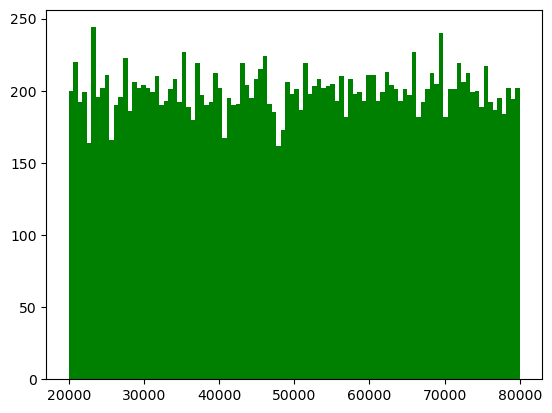

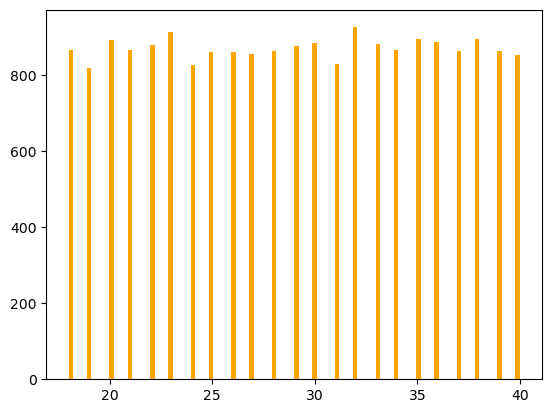

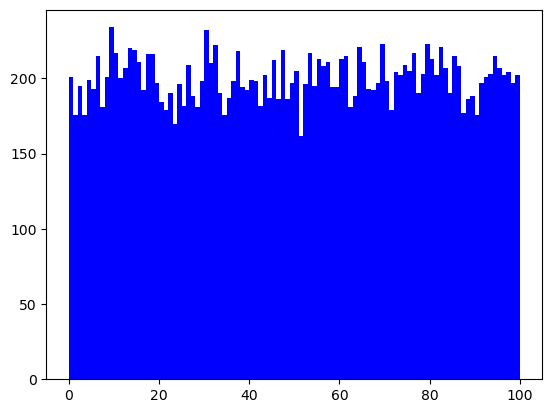

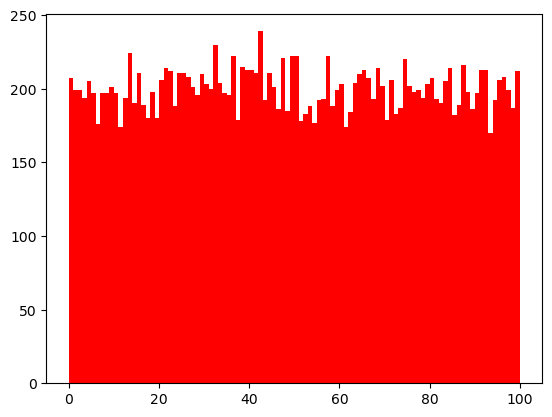

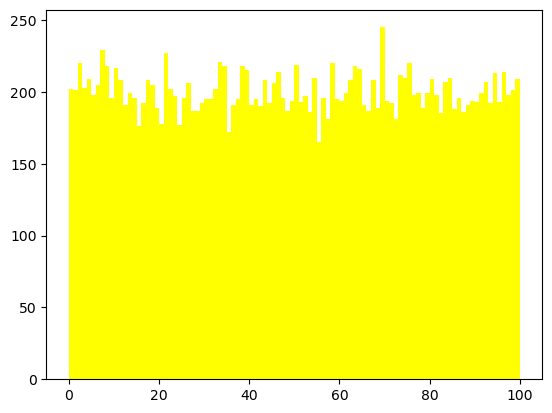

In [28]:
import matplotlib.pyplot as plt

plt.hist(va_enc_df['Income'], bins=100, color="green")
plt.show()

plt.hist(va_enc_df['Age'], bins=100, color="orange")
plt.show()

plt.hist(va_enc_df['Appearance_Score'], bins=100, color="blue")
plt.show()

plt.hist(va_enc_df['Interests_Score'], bins=100, color="red")
plt.show()

plt.hist(va_enc_df['Confidence_Score'], bins=100, color="yellow")
plt.show()

#### 시각화 후 이상치 재확인, 제거

In [65]:
va_enc_df.index += 1

In [30]:
va_enc_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,1,77648,63.94,88.18,30.09,0,0,1
1,23,1,71617,2.50,49.98,76.45,0,0,1
2,34,1,38616,27.50,33.90,33.76,3,0,1
3,37,1,79473,22.32,25.47,43.32,2,1,1
4,38,1,43510,73.65,43.63,32.44,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,26,0,36355,65.62,45.80,87.23,1,0,0
19996,21,0,55355,32.17,19.26,7.88,1,0,1
19997,31,1,31910,45.02,13.93,39.64,3,1,1
19998,33,0,22483,73.67,64.29,29.53,2,1,1


In [31]:
va_enc_df.value_counts('Valentine_Date')

Valentine_Date
0    10134
1     9866
Name: count, dtype: int64

target의 비중이 0 즉, 음성에 치우쳐져 있는 불균형 데이터이다.  
그래서 '오버 샘플링' 을 통해 1, 양성의 데이터를 음성의 데이터의 수와 동일하게 맞춰 주었다.

In [67]:
class_1_sample = va_enc_df[va_enc_df.Valentine_Date == 1].sample(10133, replace=True, random_state=124)

class_0_sample = va_enc_df[va_enc_df.Valentine_Date == 0].sample(10133, replace=False, random_state=124)

va_enc_df = pd.concat([class_1_sample, class_0_sample]).reset_index(drop=True)

va_enc_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,20,0,36733,92.21,85.81,97.75,3,0,1
1,38,1,32344,36.58,1.98,42.78,3,1,1
2,36,0,52556,19.25,25.50,6.62,2,0,1
3,25,0,23241,74.84,68.05,27.51,0,0,1
4,27,0,33669,28.01,91.74,72.83,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,34,1,72501,78.70,90.94,77.79,2,1,0
20262,36,0,74826,36.19,94.18,84.02,0,0,0
20263,33,0,21658,16.33,68.00,34.39,3,0,0
20264,33,1,27840,74.00,97.38,82.66,0,1,0


#### 최초 임의 훈련

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(max_depth=10)

features, targets = va_enc_df.iloc[:,:-1] , va_enc_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 

DecisionTreeClassifier(max_depth=10)

### graphviz 확인

In [34]:
va_enc_df.columns

Index(['Age', 'Gender', 'Income', 'Appearance_Score', 'Interests_Score',
       'Confidence_Score', 'Educational_Status', 'Job_Type', 'Valentine_Date'],
      dtype='object')

In [35]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [36]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/va_dtc01.dot', 
    class_names=class_names, 
    feature_names=features.columns,
    impurity=True, 
    filled=True
)

In [37]:
import graphviz

with open('./images/va_dtc01.dot') as f:
    va_dtc01 = f.read()

va_dtc01_graph = graphviz.Source(va_dtc01)

In [38]:
va_dtc01_graph.render(filename='va_dtc01', directory='./images', format='png')

'images\\va_dtc01.png'

<img src='./images/va_dtc01.png'>

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

0.5083867784903798

In [40]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
va_enc_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,26,1,46075,62.04,85.32,59.56,1,0,1
1,22,1,58807,45.26,62.79,52.22,3,1,1
2,37,1,33212,73.06,51.68,22.64,1,1,1
3,36,0,62496,64.50,20.85,47.17,2,0,1
4,27,1,38377,28.49,40.74,35.90,2,1,1
...,...,...,...,...,...,...,...,...,...
20261,25,1,61893,24.67,40.13,97.61,3,0,0
20262,21,1,69245,72.72,93.67,19.05,2,0,0
20263,28,1,78896,1.07,76.41,41.84,3,1,0
20264,21,1,54536,9.99,22.97,54.99,0,0,0


In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = va_enc_df.iloc[:, :-1], va_enc_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [100,110,120,130,140,150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_split': 100}",0.507094,48,0.510481,0.501233,0.502159
1,"{'max_depth': 7, 'min_samples_split': 110}",0.507217,45,0.510481,0.501233,0.502159
2,"{'max_depth': 7, 'min_samples_split': 120}",0.507217,45,0.510481,0.501233,0.502159
3,"{'max_depth': 7, 'min_samples_split': 130}",0.507279,43,0.510481,0.499383,0.502159
4,"{'max_depth': 7, 'min_samples_split': 140}",0.507279,43,0.510481,0.499383,0.502159
5,"{'max_depth': 7, 'min_samples_split': 150}",0.507094,47,0.510481,0.499383,0.502159
6,"{'max_depth': 8, 'min_samples_split': 100}",0.509809,36,0.505549,0.496917,0.501542
7,"{'max_depth': 8, 'min_samples_split': 110}",0.509994,32,0.505549,0.497534,0.501542
8,"{'max_depth': 8, 'min_samples_split': 120}",0.509994,32,0.505549,0.497534,0.501542
9,"{'max_depth': 8, 'min_samples_split': 130}",0.509994,30,0.505549,0.495684,0.501542


In [68]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_split=100)

In [69]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 52.1954%


In [70]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = va_enc_df.iloc[:, :-1], va_enc_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(11,20), 'min_samples_split': [100, 110, 120, 130, 140, 150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 11, 'min_samples_split': 100}",0.525350,43,0.548089,0.523428,0.520049
1,"{'max_depth': 11, 'min_samples_split': 110}",0.525165,44,0.545623,0.522811,0.520049
2,"{'max_depth': 11, 'min_samples_split': 120}",0.524240,45,0.544390,0.519112,0.520049
3,"{'max_depth': 11, 'min_samples_split': 130}",0.524117,46,0.543773,0.519112,0.520049
4,"{'max_depth': 11, 'min_samples_split': 140}",0.523685,47,0.543157,0.521578,0.523134
5,"{'max_depth': 11, 'min_samples_split': 150}",0.522821,48,0.542540,0.521578,0.523134
6,"{'max_depth': 12, 'min_samples_split': 100}",0.521772,49,0.545623,0.528977,0.524368
7,"{'max_depth': 12, 'min_samples_split': 110}",0.521279,50,0.543157,0.528360,0.524368
8,"{'max_depth': 12, 'min_samples_split': 120}",0.520354,51,0.541924,0.524661,0.524368
9,"{'max_depth': 12, 'min_samples_split': 130}",0.520168,52,0.545006,0.524044,0.524368


In [71]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_split=110)

In [47]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 52.1954%


In [72]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = va_enc_df.iloc[:, :-1], va_enc_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(15, 24), 'min_samples_split': [100, 110, 120]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 15, 'min_samples_split': 100}",0.534048,26,0.537608,0.538841,0.543492
1,"{'max_depth': 15, 'min_samples_split': 110}",0.534789,25,0.537608,0.538224,0.545959
2,"{'max_depth': 15, 'min_samples_split': 120}",0.533062,27,0.535142,0.534525,0.544725
3,"{'max_depth': 16, 'min_samples_split': 100}",0.537132,22,0.546239,0.539457,0.548427
4,"{'max_depth': 16, 'min_samples_split': 110}",0.538058,18,0.546856,0.539457,0.550895
5,"{'max_depth': 16, 'min_samples_split': 120}",0.535775,24,0.544390,0.535758,0.549661
6,"{'max_depth': 17, 'min_samples_split': 100}",0.537317,21,0.545623,0.540691,0.545342
7,"{'max_depth': 17, 'min_samples_split': 110}",0.537687,20,0.546239,0.540074,0.549044
8,"{'max_depth': 17, 'min_samples_split': 120}",0.536145,23,0.543773,0.538841,0.547810
9,"{'max_depth': 18, 'min_samples_split': 100}",0.539044,17,0.556720,0.544390,0.549661


In [73]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=23, min_samples_split=100)

In [74]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 55.6734%


이전과 거의 차이가 없음

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 732 1295]
 [ 502 1525]]
정확도: 0.5567, 정밀도: 0.5408, 재현율: 0.7523, F1: 0.6293, ROC-AUC: 0.5567
################################################################################


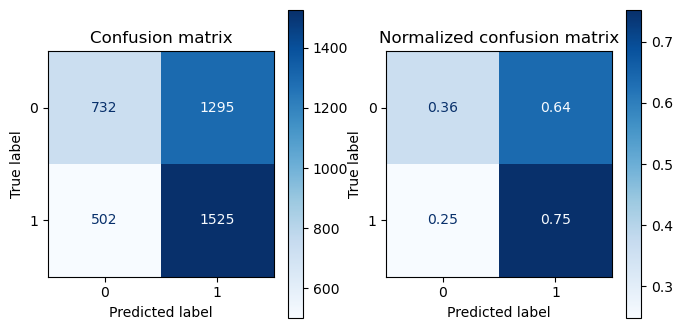

In [76]:
get_evaluation(y_test, prediction, dtc, X_test)

In [77]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.22727272727272727, 0.7727272727272727] 1
[0.1076923076923077, 0.8923076923076924] 1
[0.4927586808584889, 0.507241319141511] 1
[0.4927586808584889, 0.507241319141511] 1
[0.4927586808584889, 0.507241319141511] 1
[0.5, 0.5] 0
[0.1076923076923077, 0.8923076923076924] 1
[0.24817518248175183, 0.7518248175182481] 1
[0.5530799475753604, 0.44692005242463956] 0
[0.4927586808584889, 0.507241319141511] 1
[0.4774494556765163, 0.5225505443234837] 1
[0.06666666666666667, 0.9333333333333333] 1
[0.9, 0.1] 0
[1.0, 0.0] 0
[0.4927586808584889, 0.507241319141511] 1
[0.4927586808584889, 0.507241319141511] 1
[0.12903225806451613, 0.8709677419354839] 1
[0.4421052631578947, 0.5578947368421052] 1
[0.8095238095238095, 0.19047619047619047] 0
[0.32894736842105265, 0.6710526315789473] 1
[0.4774494556765163, 0.5225505443234837] 1
[1.0, 0.0] 0
[0.4927586808584889, 0.507241319141511] 1
[0.4927586808584889, 0.507241319141511] 1
[0.7066666666666667, 0.29333333333333333] 0
[0.4927586808584889, 0.507241319141511] 1
[0.

In [78]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [79]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[ 732 1295]
 [ 502 1525]]
정확도: 0.5567, 정밀도: 0.5408, 재현율: 0.7523, F1: 0.6293, ROC-AUC: 0.5567
################################################################################


In [80]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

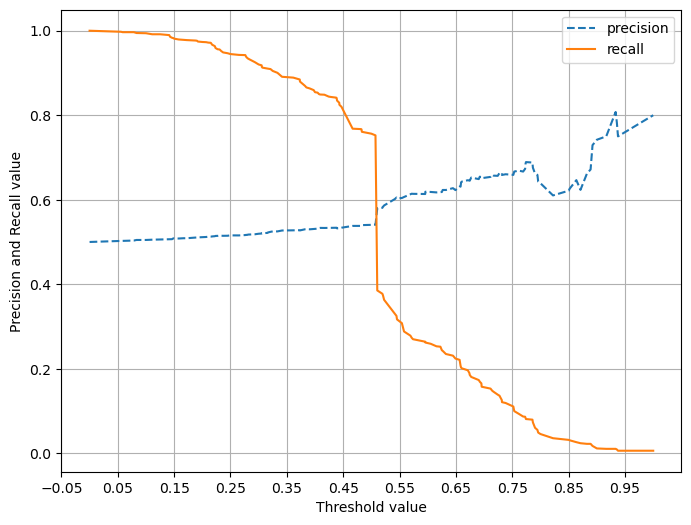

In [82]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

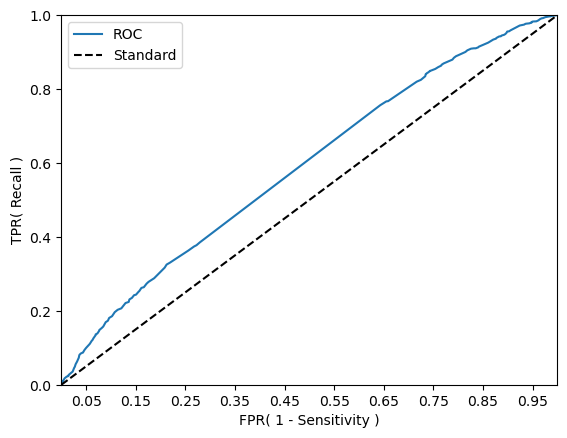

In [83]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [84]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 55.6734%


In [85]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.05555556, 0.05882353, 0.07692308, 0.07843137,
       0.08333333, 0.1       , 0.11111111, 0.125     , 0.14130435,
       0.14285714, 0.14634146, 0.14814815, 0.15      , 0.15789474,
       0.16666667, 0.17241379, 0.1875    , 0.19047619, 0.19230769,
       0.2       , 0.20689655, 0.21052632, 0.21505376, 0.2173913 ,
       0.22222222, 0.22340426, 0.22727273, 0.23076923, 0.23333333,
       0.23684211, 0.24489796, 0.25      , 0.26470588, 0.27631579,
       0.27777778, 0.27906977, 0.28125   , 0.29333333, 0.29824561,
       0.3       , 0.30526316, 0.30555556, 0.30645161, 0.31578947,
       0.3164557 , 0.32098765, 0.325     , 0.33333333, 0.34146341,
       0.36144578, 0.37288136, 0.37327189, 0.38235294, 0.38461538,
       0.390625  , 0.39759036, 0.4       , 0.40449438, 0.40697674,
       0.40909091, 0.41666667, 0.42424242, 0.42857143, 0.4375    ,
       0.43835616, 0.43902439, 0.44303797, 0.44318182, 0.44692005,
       0.46666667, 0.48148148, 0.48235294, 0.48314607, 0.5    

In [61]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[  27 2000]
 [   4 2023]]
정확도: 0.5057, 정밀도: 0.5029, 재현율: 0.9980, F1: 0.6688, ROC-AUC: 0.5057
################################################################################
0.045454545454545456
오차 행렬
[[  28 1999]
 [   4 2023]]
정확도: 0.5059, 정밀도: 0.5030, 재현율: 0.9980, F1: 0.6689, ROC-AUC: 0.5059
################################################################################
0.05263157894736842
오차 행렬
[[  29 1998]
 [   8 2019]]
정확도: 0.5052, 정밀도: 0.5026, 재현율: 0.9961, F1: 0.6681, ROC-AUC: 0.5052
################################################################################
0.058823529411764705
오차 행렬
[[  30 1997]
 [   9 2018]]
정확도: 0.5052, 정밀도: 0.5026, 재현율: 0.9956, F1: 0.6680, ROC-AUC: 0.5052
################################################################################
0.07692307692307693
오차 행렬
[[  34 1993]
 [  17 2010]]
정확도: 0.5042, 정밀도: 0.5021, 재현율: 0.9916, F1: 0.6667, ROC-AUC: 0.5042
################################################################################
0.0869565

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 732 1295]
 [ 502 1525]]
정확도: 0.5567, 정밀도: 0.5408, 재현율: 0.7523, F1: 0.6293, ROC-AUC: 0.5567
################################################################################


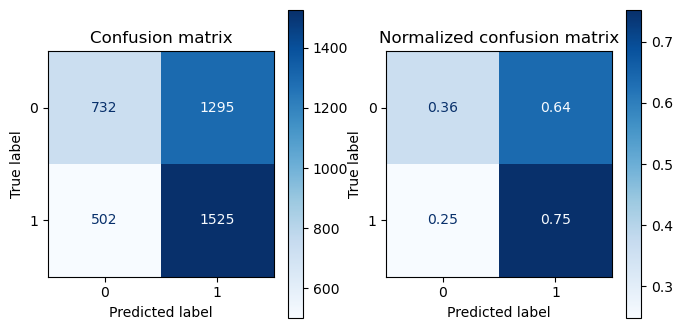

In [90]:
get_evaluation(y_test, prediction, dtc, X_test)

In [91]:
_, _, thresholds = roc_curve(y_test,proba_class1)

In [92]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

2.0
오차 행렬
[[2027    0]
 [2027    0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
1.0
오차 행렬
[[2027    0]
 [2027    0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
0.9375
오차 행렬
[[2024    3]
 [2015   12]]
정확도: 0.5022, 정밀도: 0.8000, 재현율: 0.0059, F1: 0.0118, ROC-AUC: 0.5022
################################################################################
0.9354838709677419
오차 행렬
[[2023    4]
 [2015   12]]
정확도: 0.5020, 정밀도: 0.7500, 재현율: 0.0059, F1: 0.0117, ROC-AUC: 0.5020
################################################################################
0.9333333333333333
오차 행렬
[[2022    5]
 [2009   18]]
정확도: 0.5032, 정밀도: 0.7826, 재현율: 0.0089, F1: 0.0176, ROC-AUC: 0.5032
################################################################################
0.9166666666666666
오차 행렬
[[2022    5]
 [20

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[1911  116]
 [1803  224]]
정확도: 0.5266, 정밀도: 0.6588, 재현율: 0.1105, F1: 0.1893, ROC-AUC: 0.5266
################################################################################
0.7317073170731707
오차 행렬
[[1903  124]
 [1786  241]]
정확도: 0.5289, 정밀도: 0.6603, 재현율: 0.1189, F1: 0.2015, ROC-AUC: 0.5289
################################################################################
0.7313432835820896
오차 행렬
[[1900  127]
 [1782  245]]
정확도: 0.5291, 정밀도: 0.6586, 재현율: 0.1209, F1: 0.2043, ROC-AUC: 0.5291
################################################################################
0.728
오차 행렬
[[1896  131]
 [1772  255]]
정확도: 0.5306, 정밀도: 0.6606, 재현율: 0.1258, F1: 0.2114, ROC-AUC: 0.5306
################################################################################
0.7272727272727273
오차 행렬
[[1887  140]
 [1755  272]]
정확도: 0.5326, 정밀도: 0.6602, 재현율: 0.1342, F1: 0.2230, ROC-AUC: 0.5326
################################################################################
0.7241379310344828
오차 행렬
[[1887 

In [97]:
from sklearn.preprocessing import Binarizer

threshold = 0.4444444444444444

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[ 575 1452]
 [ 365 1662]]
정확도: 0.5518, 정밀도: 0.5337, 재현율: 0.8199, F1: 0.6466, ROC-AUC: 0.5518
################################################################################


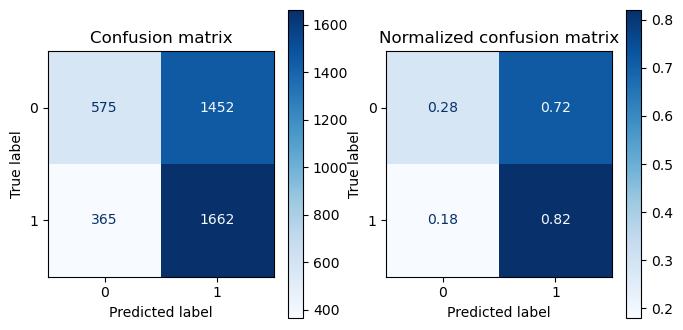

In [98]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [99]:
for proba, predict in zip(custom_proba.tolist(), custom_prediction.tolist()):
    print(proba, predict)

[0.7727272727272727] [1.0]
[0.8923076923076924] [1.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.5] [1.0]
[0.8923076923076924] [1.0]
[0.7518248175182481] [1.0]
[0.44692005242463956] [1.0]
[0.507241319141511] [1.0]
[0.5225505443234837] [1.0]
[0.9333333333333333] [1.0]
[0.1] [0.0]
[0.0] [0.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.8709677419354839] [1.0]
[0.5578947368421052] [1.0]
[0.19047619047619047] [0.0]
[0.6710526315789473] [1.0]
[0.5225505443234837] [1.0]
[0.0] [0.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.29333333333333333] [0.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.52046783625731] [1.0]
[0.507241319141511] [1.0]
[0.23076923076923078] [0.0]
[0.6710526315789473] [1.0]
[0.507241319141511] [1.0]
[0.507241319141511] [1.0]
[0.52046783625731] [1.0]
[0.5540983606557377] [1.0]
[0.5225505443234837] [1.0]
[0.507241319141511] [1.0]
[0.7518248175182481] [1.0]
[0.507241319141511] [1.0]
[0.4090909090909091] [

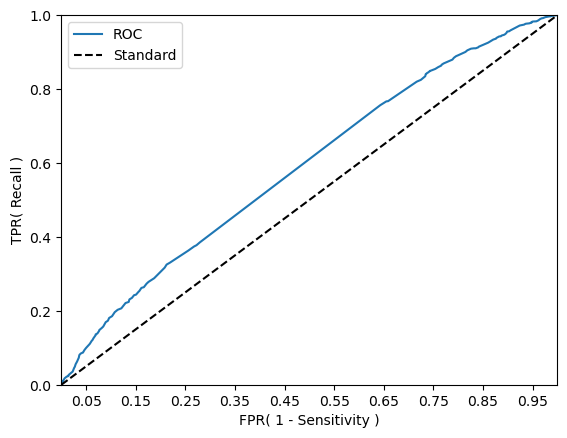

In [100]:
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

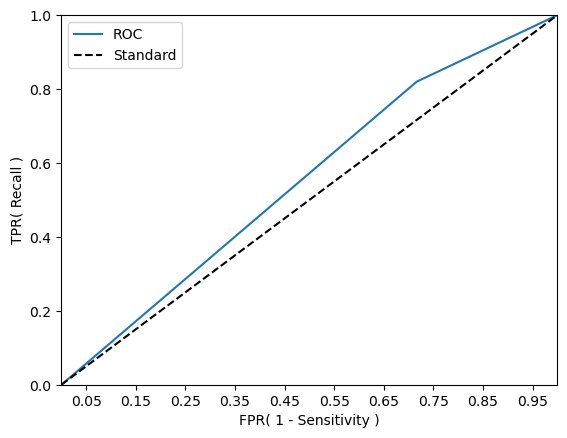

In [101]:
roc_curve_plot(y_test, custom_prediction)

#### 📌결과 1  
정확도: 0.5518, 정밀도: 0.5337, 재현율: 0.8199, F1: 0.6466, ROC-AUC: 0.5518  

일련의 과정을 진행 하였음에도 재현율은 높지만 아직도 정확도와 정밀도가 낮다.  
다음 방법으로 데이터 중 수치형 feature에 대한 standard scaler를 적용해보도록하겠다.

In [ ]:
va_enc_df

In [ ]:
va_enc_df.info()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# numeric_features = va_enc_df.select_dtypes(include=['int64', 'float64']).columns

# scaler = StandardScaler()

# va_enc_df[numeric_features] = scaler.fit_transform(va_enc_df[numeric_features])

# va_enc_df

In [104]:
df = va_enc_df.copy()

In [105]:
df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,20,0,36733,92.21,85.81,97.75,3,0,1
1,38,1,32344,36.58,1.98,42.78,3,1,1
2,36,0,52556,19.25,25.50,6.62,2,0,1
3,25,0,23241,74.84,68.05,27.51,0,0,1
4,27,0,33669,28.01,91.74,72.83,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,34,1,72501,78.70,90.94,77.79,2,1,0
20262,36,0,74826,36.19,94.18,84.02,0,0,0
20263,33,0,21658,16.33,68.00,34.39,3,0,0
20264,33,1,27840,74.00,97.38,82.66,0,1,0


#### 수치형 feature들에게만 standard scaler()를 적용

In [106]:
features_to_scale = ['Income', 'Appearance_Score', 'Interests_Score', 'Confidence_Score']

scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [107]:
df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,20,0,-0.769553,1.464478,1.246577,1.647296,3,0,1
1,38,1,-1.022904,-0.462579,-1.688691,-0.247646,3,1,1
2,36,0,0.143813,-1.062901,-0.865150,-1.494165,2,0,1
3,25,0,-1.548365,0.862771,0.624719,-0.774038,0,0,1
4,27,0,-0.946420,-0.759449,1.454213,0.788246,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,34,1,1.295117,0.996483,1.426201,0.959229,2,1,0
20262,36,0,1.429325,-0.476089,1.539648,1.173991,0,0,0
20263,33,0,-1.639742,-1.164051,0.622968,-0.536869,3,0,0
20264,33,1,-1.282892,0.833672,1.651695,1.127109,0,1,0


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(max_depth=10)

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 

DecisionTreeClassifier(max_depth=10)

In [109]:
df.columns

Index(['Age', 'Gender', 'Income', 'Appearance_Score', 'Interests_Score',
       'Confidence_Score', 'Educational_Status', 'Job_Type', 'Valentine_Date'],
      dtype='object')

In [112]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [118]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/va_dtc02.dot', 
    class_names=class_names, 
    feature_names=features.columns,
    impurity=True, 
    filled=True
)

In [119]:
import graphviz

with open('./images/va_dtc02.dot') as f:
    va_dtc02 = f.read()

va_dtc02_graph = graphviz.Source(va_dtc02)

In [120]:
va_dtc02_graph.render(filename='va_dtc02', directory='./images', format='png')

'images\\va_dtc02.png'

<img src='./images/va_dtc02.png'>

In [121]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

0.5340404538727183

In [122]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [100,110,120,130,140,150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_split': 100}",0.512892,31,0.506782,0.513564,0.529920
1,"{'max_depth': 7, 'min_samples_split': 110}",0.513201,27,0.506165,0.513564,0.529920
2,"{'max_depth': 7, 'min_samples_split': 120}",0.513324,25,0.506165,0.513564,0.529920
3,"{'max_depth': 7, 'min_samples_split': 130}",0.513324,25,0.506165,0.513564,0.529920
4,"{'max_depth': 7, 'min_samples_split': 140}",0.512707,34,0.506165,0.514180,0.529920
5,"{'max_depth': 7, 'min_samples_split': 150}",0.512768,32,0.508631,0.514180,0.529920
6,"{'max_depth': 8, 'min_samples_split': 100}",0.512459,37,0.523428,0.508631,0.503393
7,"{'max_depth': 8, 'min_samples_split': 110}",0.512706,35,0.522811,0.508631,0.503393
8,"{'max_depth': 8, 'min_samples_split': 120}",0.512953,30,0.522811,0.509864,0.503393
9,"{'max_depth': 8, 'min_samples_split': 130}",0.512768,33,0.522195,0.509864,0.503393


In [123]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=110)

In [124]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 52.0227%


In [125]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = va_enc_df.iloc[:, :-1], va_enc_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(10, 20), 'min_samples_split': [100, 110, 120]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 10, 'min_samples_split': 100}",0.513260,28,0.530826,0.524661,0.504627
1,"{'max_depth': 10, 'min_samples_split': 110}",0.513137,29,0.528977,0.524044,0.504627
2,"{'max_depth': 10, 'min_samples_split': 120}",0.512520,30,0.528977,0.520345,0.504627
3,"{'max_depth': 11, 'min_samples_split': 100}",0.525350,22,0.548089,0.523428,0.520049
4,"{'max_depth': 11, 'min_samples_split': 110}",0.525165,23,0.545623,0.522811,0.520049
5,"{'max_depth': 11, 'min_samples_split': 120}",0.524240,24,0.544390,0.519112,0.520049
6,"{'max_depth': 12, 'min_samples_split': 100}",0.521772,25,0.545623,0.528977,0.524368
7,"{'max_depth': 12, 'min_samples_split': 110}",0.521402,26,0.543157,0.528360,0.524368
8,"{'max_depth': 12, 'min_samples_split': 120}",0.520230,27,0.541924,0.524661,0.524368
9,"{'max_depth': 13, 'min_samples_split': 100}",0.528990,19,0.535142,0.534525,0.532387


In [126]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_split=110)

In [127]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 54.3414%


In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


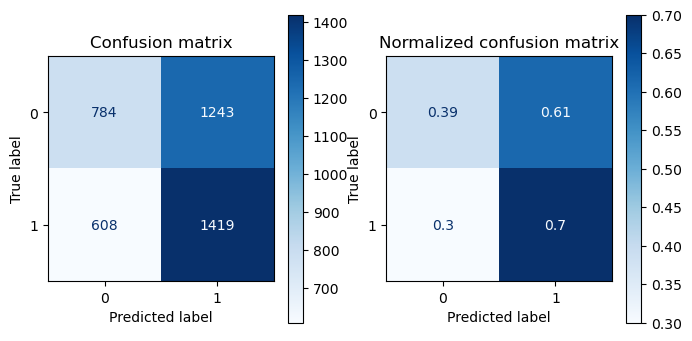

In [129]:
get_evaluation(y_test, prediction, dtc, X_test)

In [130]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.22727272727272727, 0.7727272727272727] 1
[0.1076923076923077, 0.8923076923076924] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.5, 0.5] 0
[0.1076923076923077, 0.8923076923076924] 1
[0.3422459893048128, 0.6577540106951871] 1
[0.5227864583333334, 0.4772135416666667] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.425, 0.575] 1
[0.06666666666666667, 0.9333333333333333] 1
[0.9, 0.1] 0
[0.4803921568627451, 0.5196078431372549] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.12903225806451613, 0.8709677419354839] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.8095238095238095, 0.19047619047619047] 0
[0.32894736842105265, 0.6710526315789473] 1
[0.425, 0.575] 1
[1.0, 0.0] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.7066666666666667, 0.29333333333333333] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.489909182643794

In [131]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [132]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


In [133]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

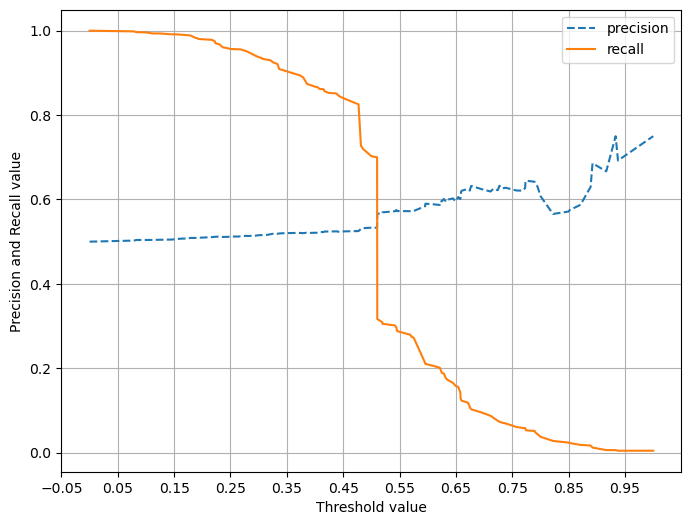

In [134]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

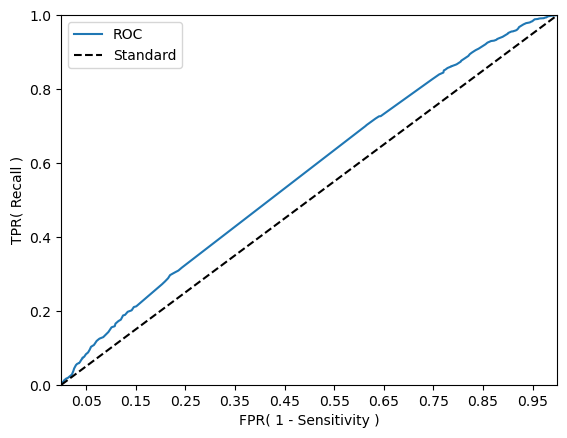

In [135]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [136]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 54.3414%


In [137]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.07692308, 0.07843137, 0.08333333, 0.1       ,
       0.11111111, 0.125     , 0.14285714, 0.14634146, 0.15789474,
       0.16666667, 0.17241379, 0.17924528, 0.1875    , 0.19047619,
       0.19230769, 0.2       , 0.20689655, 0.2173913 , 0.22222222,
       0.22340426, 0.23076923, 0.23333333, 0.23684211, 0.24489796,
       0.25      , 0.26470588, 0.26851852, 0.27777778, 0.28125   ,
       0.29333333, 0.3       , 0.30555556, 0.30645161, 0.3164557 ,
       0.32098765, 0.325     , 0.33333333, 0.3364486 , 0.34615385,
       0.36144578, 0.37288136, 0.37885463, 0.38461538, 0.3853211 ,
       0.4       , 0.40449438, 0.40697674, 0.40909091, 0.41509434,
       0.41666667, 0.42424242, 0.4375    , 0.43835616, 0.44318182,
       0.45112782, 0.47721354, 0.48148148, 0.48235294, 0.4847561 ,
       0.5       , 0.51009082, 0.51041667, 0.51948052, 0.51960784,
       0.54166667, 0.54444444, 0.54545455, 0.56923077, 0.57142857,
       0.575     , 0.59550562, 0.59574468, 0.60526316, 0.62135

In [138]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[  23 2004]
 [   3 2024]]
정확도: 0.5049, 정밀도: 0.5025, 재현율: 0.9985, F1: 0.6685, ROC-AUC: 0.5049
################################################################################
0.07692307692307693
오차 행렬
[[  24 2003]
 [   3 2024]]
정확도: 0.5052, 정밀도: 0.5026, 재현율: 0.9985, F1: 0.6686, ROC-AUC: 0.5052
################################################################################
0.0784313725490196
오차 행렬
[[  39 1988]
 [   7 2020]]
정확도: 0.5079, 정밀도: 0.5040, 재현율: 0.9965, F1: 0.6694, ROC-AUC: 0.5079
################################################################################
0.08333333333333333
오차 행렬
[[  40 1987]
 [   8 2019]]
정확도: 0.5079, 정밀도: 0.5040, 재현율: 0.9961, F1: 0.6693, ROC-AUC: 0.5079
################################################################################
0.1
오차 행렬
[[  46 1981]
 [  13 2014]]
정확도: 0.5081, 정밀도: 0.5041, 재현율: 0.9936, F1: 0.6689, ROC-AUC: 0.5081
################################################################################
0.1111111111111111
오차 행렬
[[ 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


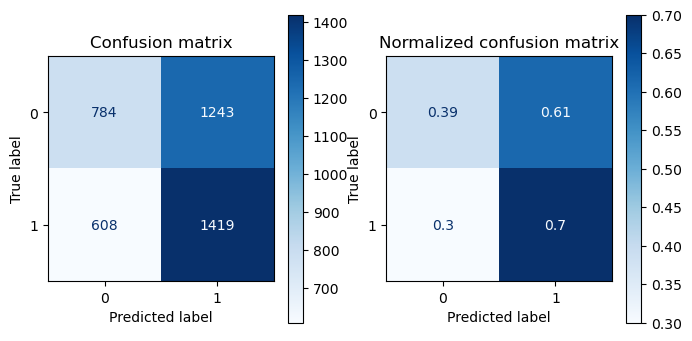

In [139]:
get_evaluation(y_test, prediction, dtc, X_test)

In [140]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


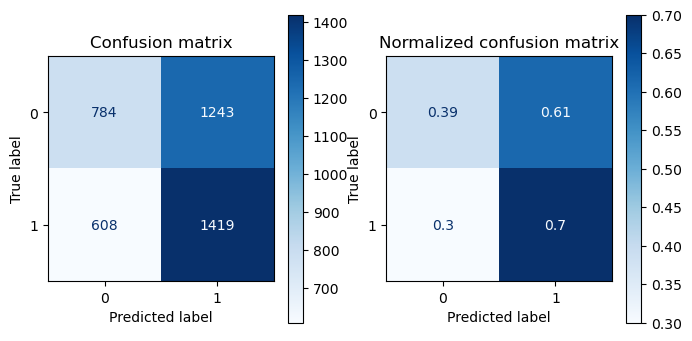

In [141]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [142]:
for proba, predict in zip(custom_proba.tolist(), custom_prediction.tolist()):
    print(proba, predict)

[0.7727272727272727] [1.0]
[0.8923076923076924] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.5] [0.0]
[0.8923076923076924] [1.0]
[0.6577540106951871] [1.0]
[0.4772135416666667] [0.0]
[0.5100908173562059] [1.0]
[0.575] [1.0]
[0.9333333333333333] [1.0]
[0.1] [0.0]
[0.5196078431372549] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.8709677419354839] [1.0]
[0.5100908173562059] [1.0]
[0.19047619047619047] [0.0]
[0.6710526315789473] [1.0]
[0.575] [1.0]
[0.0] [0.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.29333333333333333] [0.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.4847560975609756] [0.0]
[0.5100908173562059] [1.0]
[0.23076923076923078] [0.0]
[0.6710526315789473] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.4847560975609756] [0.0]
[0.4772135416666667] [0.0]
[0.575] [1.0]
[0.5100908173562059] [1.0]
[0.6577540106951871] [1.0]
[0.5100908173562059] [1.0]
[0.4090909090909091] [0.0]
[

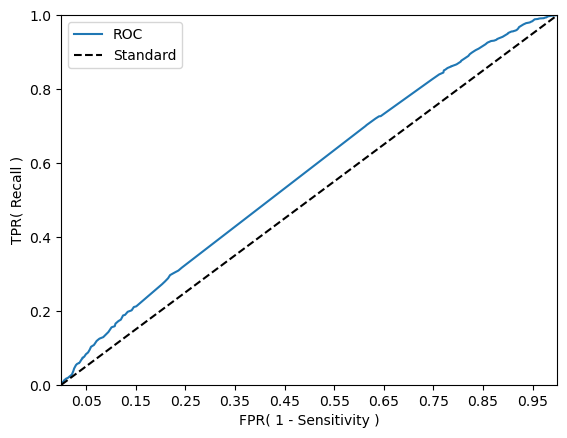

In [143]:
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

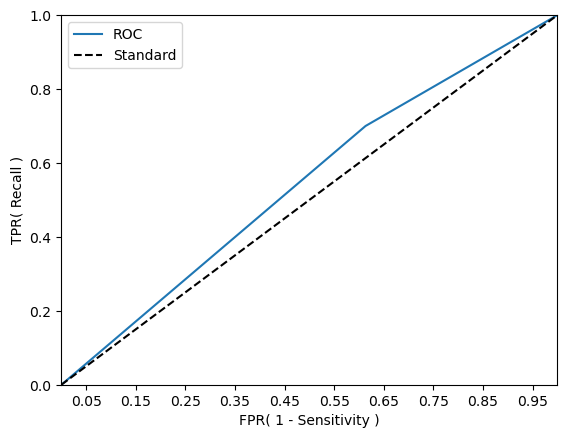

In [144]:
roc_curve_plot(y_test, custom_prediction)

#### 결과 2  
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434  

standard_scaler()를 수치형 feature들에게만 적용했을 때, 정확도, 정밀도, 재현율, F1 score 모두 떨어졌다.  
그렇담 다음 방법으로 데이터 세트 전체에 대해 standar_scaler()를 적용해보겠다.

In [148]:
dfa = va_enc_df.copy()
dfa

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,20,0,36733,92.21,85.81,97.75,3,0,1
1,38,1,32344,36.58,1.98,42.78,3,1,1
2,36,0,52556,19.25,25.50,6.62,2,0,1
3,25,0,23241,74.84,68.05,27.51,0,0,1
4,27,0,33669,28.01,91.74,72.83,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,34,1,72501,78.70,90.94,77.79,2,1,0
20262,36,0,74826,36.19,94.18,84.02,0,0,0
20263,33,0,21658,16.33,68.00,34.39,3,0,0
20264,33,1,27840,74.00,97.38,82.66,0,1,0


In [149]:
numeric_features = va_df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

dfa[numeric_features] = scaler.fit_transform(dfa[numeric_features])

In [151]:
dfa

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,-1.367711,0,-0.769553,1.464478,1.246577,1.647296,3,0,1.0
1,1.359279,1,-1.022904,-0.462579,-1.688691,-0.247646,3,1,1.0
2,1.056280,0,0.143813,-1.062901,-0.865150,-1.494165,2,0,1.0
3,-0.610214,0,-1.548365,0.862771,0.624719,-0.774038,0,0,1.0
4,-0.307215,0,-0.946420,-0.759449,1.454213,0.788246,0,0,1.0
...,...,...,...,...,...,...,...,...,...
20261,0.753281,1,1.295117,0.996483,1.426201,0.959229,2,1,-1.0
20262,1.056280,0,1.429325,-0.476089,1.539648,1.173991,0,0,-1.0
20263,0.601781,0,-1.639742,-1.164051,0.622968,-0.536869,3,0,-1.0
20264,0.601781,1,-1.282892,0.833672,1.651695,1.127109,0,1,-1.0


In [153]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20266 entries, 0 to 20265
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 20266 non-null  float64
 1   Gender              20266 non-null  int64  
 2   Income              20266 non-null  float64
 3   Appearance_Score    20266 non-null  float64
 4   Interests_Score     20266 non-null  float64
 5   Confidence_Score    20266 non-null  float64
 6   Educational_Status  20266 non-null  int64  
 7   Job_Type            20266 non-null  int64  
 8   Valentine_Date      20266 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.4 MB


In [189]:
dfa.value_counts('Valentine_Date')

Valentine_Date
-1.0    10133
 1.0    10133
Name: count, dtype: int64

In [194]:
import pandas as pd

dfa['Valentine_Date'] = dfa['Valentine_Date'].astype('int64')

In [192]:
dfa

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,-1.367711,0,-0.769553,1.464478,1.246577,1.647296,3,0,1
1,1.359279,1,-1.022904,-0.462579,-1.688691,-0.247646,3,1,1
2,1.056280,0,0.143813,-1.062901,-0.865150,-1.494165,2,0,1
3,-0.610214,0,-1.548365,0.862771,0.624719,-0.774038,0,0,1
4,-0.307215,0,-0.946420,-0.759449,1.454213,0.788246,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,0.753281,1,1.295117,0.996483,1.426201,0.959229,2,1,-1
20262,1.056280,0,1.429325,-0.476089,1.539648,1.173991,0,0,-1
20263,0.601781,0,-1.639742,-1.164051,0.622968,-0.536869,3,0,-1
20264,0.601781,1,-1.282892,0.833672,1.651695,1.127109,0,1,-1


In [195]:
dfa['Valentine_Date'] = dfa['Valentine_Date'].replace(-1, 0)
dfa

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,-1.367711,0,-0.769553,1.464478,1.246577,1.647296,3,0,1
1,1.359279,1,-1.022904,-0.462579,-1.688691,-0.247646,3,1,1
2,1.056280,0,0.143813,-1.062901,-0.865150,-1.494165,2,0,1
3,-0.610214,0,-1.548365,0.862771,0.624719,-0.774038,0,0,1
4,-0.307215,0,-0.946420,-0.759449,1.454213,0.788246,0,0,1
...,...,...,...,...,...,...,...,...,...
20261,0.753281,1,1.295117,0.996483,1.426201,0.959229,2,1,0
20262,1.056280,0,1.429325,-0.476089,1.539648,1.173991,0,0,0
20263,0.601781,0,-1.639742,-1.164051,0.622968,-0.536869,3,0,0
20264,0.601781,1,-1.282892,0.833672,1.651695,1.127109,0,1,0


In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(max_depth=10)

features, targets = dfa.iloc[:,:-1] , dfa.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train) 

DecisionTreeClassifier(max_depth=10)

In [197]:
df.columns

Index(['Age', 'Gender', 'Income', 'Appearance_Score', 'Interests_Score',
       'Confidence_Score', 'Educational_Status', 'Job_Type', 'Valentine_Date'],
      dtype='object')

In [198]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [199]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/va_dtc03.dot', 
    class_names=class_names, 
    feature_names=features.columns,
    impurity=True, 
    filled=True
)

In [200]:
import graphviz

with open('./images/va_dtc03.dot') as f:
    va_dtc03 = f.read()

va_dtc03_graph = graphviz.Source(va_dtc03)

In [201]:
va_dtc03_graph.render(filename='va_dtc03', directory='./images', format='png')

'images\\va_dtc03.png'

<img src='./images/va_dtc03.png'>

In [203]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

0.5337937839171188

In [204]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [205]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = dfa.iloc[:, :-1], dfa.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [100,110,120,130,140,150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_split': 100}",0.512892,31,0.506782,0.513564,0.529920
1,"{'max_depth': 7, 'min_samples_split': 110}",0.513201,27,0.506165,0.513564,0.529920
2,"{'max_depth': 7, 'min_samples_split': 120}",0.513324,25,0.506165,0.513564,0.529920
3,"{'max_depth': 7, 'min_samples_split': 130}",0.513324,25,0.506165,0.513564,0.529920
4,"{'max_depth': 7, 'min_samples_split': 140}",0.512707,34,0.506165,0.514180,0.529920
5,"{'max_depth': 7, 'min_samples_split': 150}",0.512768,32,0.508631,0.514180,0.529920
6,"{'max_depth': 8, 'min_samples_split': 100}",0.512459,37,0.523428,0.508631,0.503393
7,"{'max_depth': 8, 'min_samples_split': 110}",0.512706,35,0.522811,0.508631,0.503393
8,"{'max_depth': 8, 'min_samples_split': 120}",0.512953,30,0.522811,0.509864,0.503393
9,"{'max_depth': 8, 'min_samples_split': 130}",0.512768,33,0.522195,0.509864,0.503393


In [163]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=110)

In [206]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(11,20), 'min_samples_split': [100, 110, 120, 130, 140, 150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 11, 'min_samples_split': 100}",0.525289,43,0.548089,0.523428,0.520666
1,"{'max_depth': 11, 'min_samples_split': 110}",0.525104,44,0.545623,0.522811,0.520666
2,"{'max_depth': 11, 'min_samples_split': 120}",0.524179,45,0.544390,0.519112,0.520666
3,"{'max_depth': 11, 'min_samples_split': 130}",0.524055,46,0.543773,0.519112,0.520666
4,"{'max_depth': 11, 'min_samples_split': 140}",0.523623,47,0.543157,0.521578,0.523751
5,"{'max_depth': 11, 'min_samples_split': 150}",0.522760,48,0.542540,0.521578,0.523751
6,"{'max_depth': 12, 'min_samples_split': 100}",0.521587,49,0.545623,0.528977,0.524985
7,"{'max_depth': 12, 'min_samples_split': 110}",0.521217,50,0.543157,0.528360,0.524985
8,"{'max_depth': 12, 'min_samples_split': 120}",0.520292,51,0.541924,0.524661,0.524985
9,"{'max_depth': 12, 'min_samples_split': 130}",0.520107,52,0.545006,0.524044,0.524985


In [165]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_split=110)

In [166]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 54.3414%


In [167]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = dfa.iloc[:, :-1], dfa.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': range(18, 23), 'min_samples_split': [100, 110, 120]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True, n_jobs=-1)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 18, 'min_samples_split': 100}",0.539537,14,0.556720,0.545623,0.550278
1,"{'max_depth': 18, 'min_samples_split': 110}",0.540154,13,0.557337,0.545006,0.553979
2,"{'max_depth': 18, 'min_samples_split': 120}",0.537872,15,0.554871,0.543773,0.553362
3,"{'max_depth': 19, 'min_samples_split': 100}",0.545090,11,0.549938,0.548089,0.551511
4,"{'max_depth': 19, 'min_samples_split': 110}",0.545830,10,0.550555,0.548705,0.555213
5,"{'max_depth': 19, 'min_samples_split': 120}",0.542869,12,0.548089,0.541307,0.554596
6,"{'max_depth': 20, 'min_samples_split': 100}",0.550395,8,0.548705,0.551788,0.549661
7,"{'max_depth': 20, 'min_samples_split': 110}",0.550518,7,0.549322,0.548089,0.553362
8,"{'max_depth': 20, 'min_samples_split': 120}",0.548421,9,0.546856,0.546856,0.552745
9,"{'max_depth': 21, 'min_samples_split': 100}",0.552369,4,0.541924,0.549322,0.553979


In [207]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_split=110)

In [208]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 54.3414%


In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


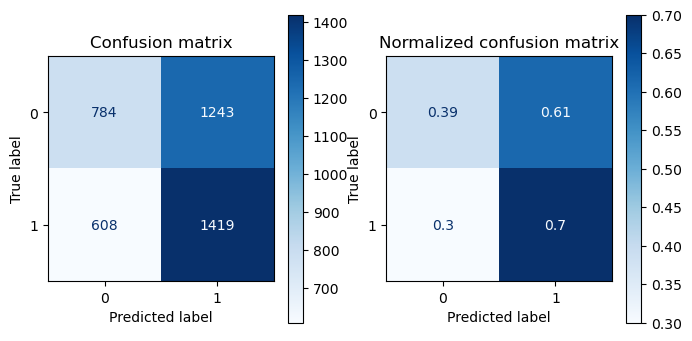

In [210]:
get_evaluation(y_test, prediction, dtc, X_test)

In [211]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.22727272727272727, 0.7727272727272727] 1
[0.1076923076923077, 0.8923076923076924] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.5, 0.5] 0
[0.1076923076923077, 0.8923076923076924] 1
[0.3422459893048128, 0.6577540106951871] 1
[0.5227864583333334, 0.4772135416666667] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.425, 0.575] 1
[0.06666666666666667, 0.9333333333333333] 1
[0.9, 0.1] 0
[0.4803921568627451, 0.5196078431372549] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.12903225806451613, 0.8709677419354839] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.8095238095238095, 0.19047619047619047] 0
[0.32894736842105265, 0.6710526315789473] 1
[0.425, 0.575] 1
[1.0, 0.0] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.4899091826437941, 0.5100908173562059] 1
[0.7066666666666667, 0.29333333333333333] 0
[0.4899091826437941, 0.5100908173562059] 1
[0.489909182643794

In [212]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [213]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[ 784 1243]
 [ 608 1419]]
정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434
################################################################################


In [214]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

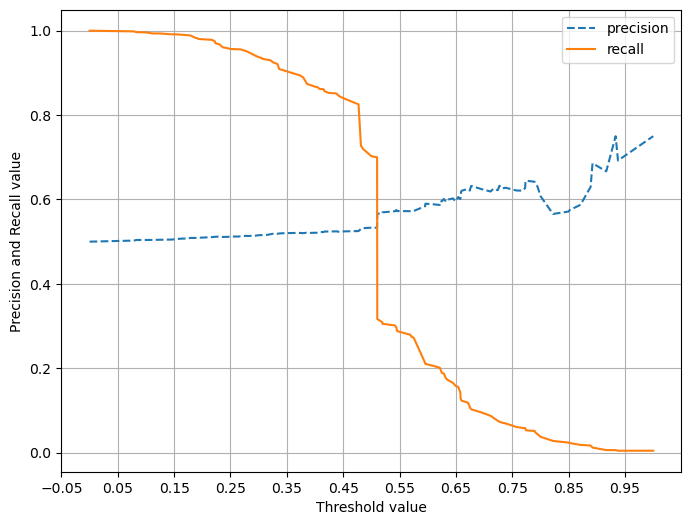

In [215]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

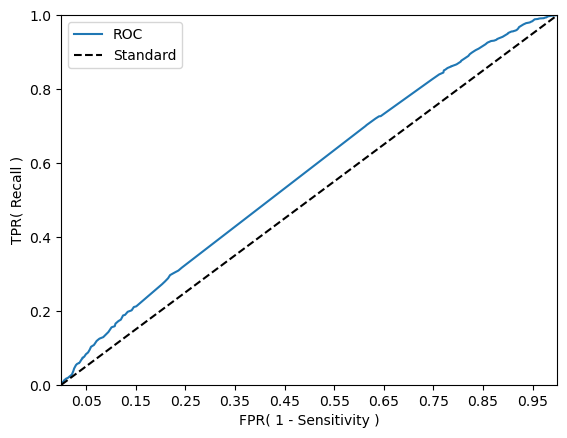

In [216]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [217]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 54.3414%


In [218]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.07692308, 0.07843137, 0.08333333, 0.1       ,
       0.11111111, 0.125     , 0.14285714, 0.14634146, 0.15789474,
       0.16666667, 0.17241379, 0.17924528, 0.1875    , 0.19047619,
       0.19230769, 0.2       , 0.20689655, 0.2173913 , 0.22222222,
       0.22340426, 0.23076923, 0.23333333, 0.23684211, 0.24489796,
       0.25      , 0.26470588, 0.26851852, 0.27777778, 0.28125   ,
       0.29333333, 0.3       , 0.30555556, 0.30645161, 0.3164557 ,
       0.32098765, 0.325     , 0.33333333, 0.3364486 , 0.34615385,
       0.36144578, 0.37288136, 0.37885463, 0.38461538, 0.3853211 ,
       0.4       , 0.40449438, 0.40697674, 0.40909091, 0.41509434,
       0.41666667, 0.42424242, 0.4375    , 0.43835616, 0.44318182,
       0.45112782, 0.47721354, 0.48148148, 0.48235294, 0.4847561 ,
       0.5       , 0.51009082, 0.51041667, 0.51948052, 0.51960784,
       0.54166667, 0.54444444, 0.54545455, 0.56923077, 0.57142857,
       0.575     , 0.59550562, 0.59574468, 0.60526316, 0.62135

In [219]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[  23 2004]
 [   3 2024]]
정확도: 0.5049, 정밀도: 0.5025, 재현율: 0.9985, F1: 0.6685, ROC-AUC: 0.5049
################################################################################
0.07692307692307693
오차 행렬
[[  24 2003]
 [   3 2024]]
정확도: 0.5052, 정밀도: 0.5026, 재현율: 0.9985, F1: 0.6686, ROC-AUC: 0.5052
################################################################################
0.0784313725490196
오차 행렬
[[  39 1988]
 [   7 2020]]
정확도: 0.5079, 정밀도: 0.5040, 재현율: 0.9965, F1: 0.6694, ROC-AUC: 0.5079
################################################################################
0.08333333333333333
오차 행렬
[[  40 1987]
 [   8 2019]]
정확도: 0.5079, 정밀도: 0.5040, 재현율: 0.9961, F1: 0.6693, ROC-AUC: 0.5079
################################################################################
0.1
오차 행렬
[[  46 1981]
 [  13 2014]]
정확도: 0.5081, 정밀도: 0.5041, 재현율: 0.9936, F1: 0.6689, ROC-AUC: 0.5081
################################################################################
0.1111111111111111
오차 행렬
[[ 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[ 754 1273]
 [ 545 1482]]
정확도: 0.5516, 정밀도: 0.5516, 재현율: 0.5516, F1: 0.5516
################################################################################


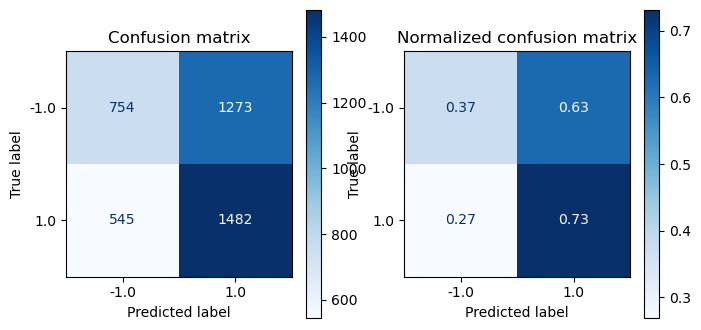

In [186]:
get_evaluation(y_test, prediction, dtc, X_test)

In [220]:
from sklearn.preprocessing import Binarizer

threshold = 0.4847560975609756

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[ 780 1247]
 [ 603 1424]]
정확도: 0.5437, 정밀도: 0.5331, 재현율: 0.7025, F1: 0.6062, ROC-AUC: 0.5437
################################################################################


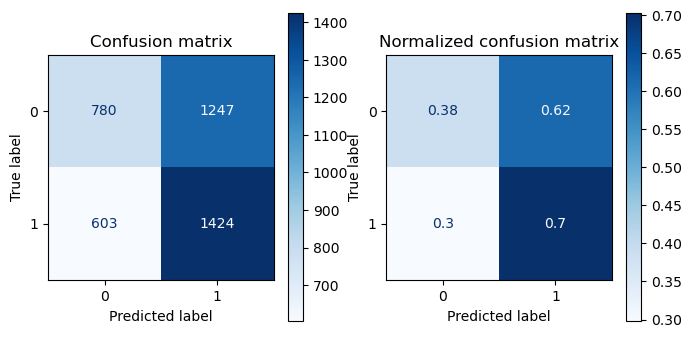

In [221]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [222]:
for proba, predict in zip(custom_proba.tolist(), custom_prediction.tolist()):
    print(proba, predict)

[0.7727272727272727] [1.0]
[0.8923076923076924] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.5] [1.0]
[0.8923076923076924] [1.0]
[0.6577540106951871] [1.0]
[0.4772135416666667] [0.0]
[0.5100908173562059] [1.0]
[0.575] [1.0]
[0.9333333333333333] [1.0]
[0.1] [0.0]
[0.5196078431372549] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.8709677419354839] [1.0]
[0.5100908173562059] [1.0]
[0.19047619047619047] [0.0]
[0.6710526315789473] [1.0]
[0.575] [1.0]
[0.0] [0.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.29333333333333333] [0.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.4847560975609756] [0.0]
[0.5100908173562059] [1.0]
[0.23076923076923078] [0.0]
[0.6710526315789473] [1.0]
[0.5100908173562059] [1.0]
[0.5100908173562059] [1.0]
[0.4847560975609756] [0.0]
[0.4772135416666667] [0.0]
[0.575] [1.0]
[0.5100908173562059] [1.0]
[0.6577540106951871] [1.0]
[0.5100908173562059] [1.0]
[0.4090909090909091] [0.0]
[

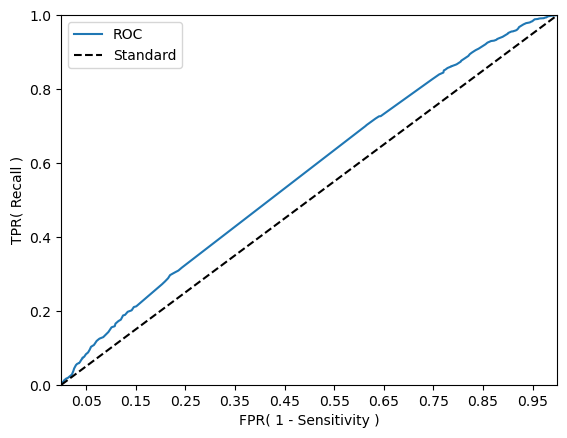

In [223]:
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

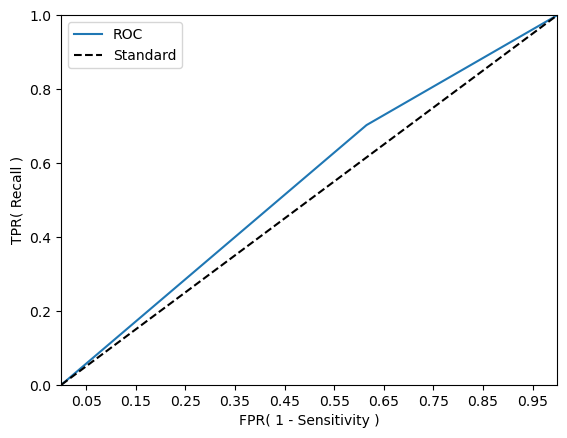

In [224]:
roc_curve_plot(y_test, custom_prediction)

#### 📌결과 3  
결과 1 = 정확도: 0.5518, 정밀도: 0.5337, 재현율: 0.8199, F1: 0.6466, ROC-AUC: 0.5518  
결과 2 = 정확도: 0.5434, 정밀도: 0.5331, 재현율: 0.7000, F1: 0.6052, ROC-AUC: 0.5434  
결과 3 = 정확도: 0.5437, 정밀도: 0.5331, 재현율: 0.7025, F1: 0.6062, ROC-AUC: 0.5437  

3개의 과정을 진행 하였을 때, 데이터 전처리만 하고 나서 진행 했을 경우가 정확도, 정밀도, 재현율, F1 score 까지 모두 높았으며, standar_scaler() 수치형 또는 전체 feature에 진행 하였을 때는 큰 차이가 없었다.

질문 1.데이터 전처리 과정에서 문제가 없었는가?  